# Pearson Correlation Coefficient

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # Escala los datos
from scipy import stats

In [2]:
def loadCSV(pathSamples, pathMatrix):
    df_loaded = pd.read_table(pathMatrix, sep=',')
    data = pd.read_table(pathSamples, sep=',')
    clin_trial_values = df_loaded.values
    
    Y = data['Eligible']
    Y = Y.astype(int)
    X = clin_trial_values[:, :]
    return X, Y

In [134]:
def saveMatrix(df, name):
    path = '../../Tables/'
    path += name + '.h5'
    df.to_hdf(path, key='df', index=False)
    return 

In [3]:
X, Y = loadCSV("../../Dataset/10k_1Col_NoCarEsp_LSA.csv", "../../Tables/docsTopicsLSA1500.csv") #Cargar SCV

In [9]:
print(np.array(np.array(Y)))

[0 0 0 ... 1 1 1]


In [34]:
feat_out = np.array([X[:,j] for j in range(X.shape[1])]).T
feat_out = np.c_[ feat_out, Y ]
np.corrcoef(feat_out.T)

array([[ 1.00000000e+00, -9.31794576e-02, -2.24611231e-01, ...,
         1.84898288e-03, -2.18561452e-02, -2.73124482e-02],
       [-9.31794576e-02,  1.00000000e+00, -2.14431335e-03, ...,
         1.76518273e-05, -2.08655745e-04,  4.43184418e-02],
       [-2.24611231e-01, -2.14431335e-03,  1.00000000e+00, ...,
         4.25501367e-05, -5.02969486e-04, -1.03977294e-01],
       ...,
       [ 1.84898288e-03,  1.76518273e-05,  4.25501367e-05, ...,
         1.00000000e+00,  4.14040723e-06, -1.99600789e-02],
       [-2.18561452e-02, -2.08655745e-04, -5.02969486e-04, ...,
         4.14040723e-06,  1.00000000e+00, -6.67534250e-03],
       [-2.73124482e-02,  4.43184418e-02, -1.03977294e-01, ...,
        -1.99600789e-02, -6.67534250e-03,  1.00000000e+00]])

In [57]:
feat_out = [X[:,j] for j in range(X.shape[1])]
p =np.corrcoef(feat_out, Y)
p

array([[ 1.00000000e+00, -9.31794576e-02, -2.24611231e-01, ...,
         1.84898288e-03, -2.18561452e-02, -2.73124482e-02],
       [-9.31794576e-02,  1.00000000e+00, -2.14431335e-03, ...,
         1.76518273e-05, -2.08655745e-04,  4.43184418e-02],
       [-2.24611231e-01, -2.14431335e-03,  1.00000000e+00, ...,
         4.25501367e-05, -5.02969486e-04, -1.03977294e-01],
       ...,
       [ 1.84898288e-03,  1.76518273e-05,  4.25501367e-05, ...,
         1.00000000e+00,  4.14040723e-06, -1.99600789e-02],
       [-2.18561452e-02, -2.08655745e-04, -5.02969486e-04, ...,
         4.14040723e-06,  1.00000000e+00, -6.67534250e-03],
       [-2.73124482e-02,  4.43184418e-02, -1.03977294e-01, ...,
        -1.99600789e-02, -6.67534250e-03,  1.00000000e+00]])

In [59]:
np.fill_diagonal(p, 1)

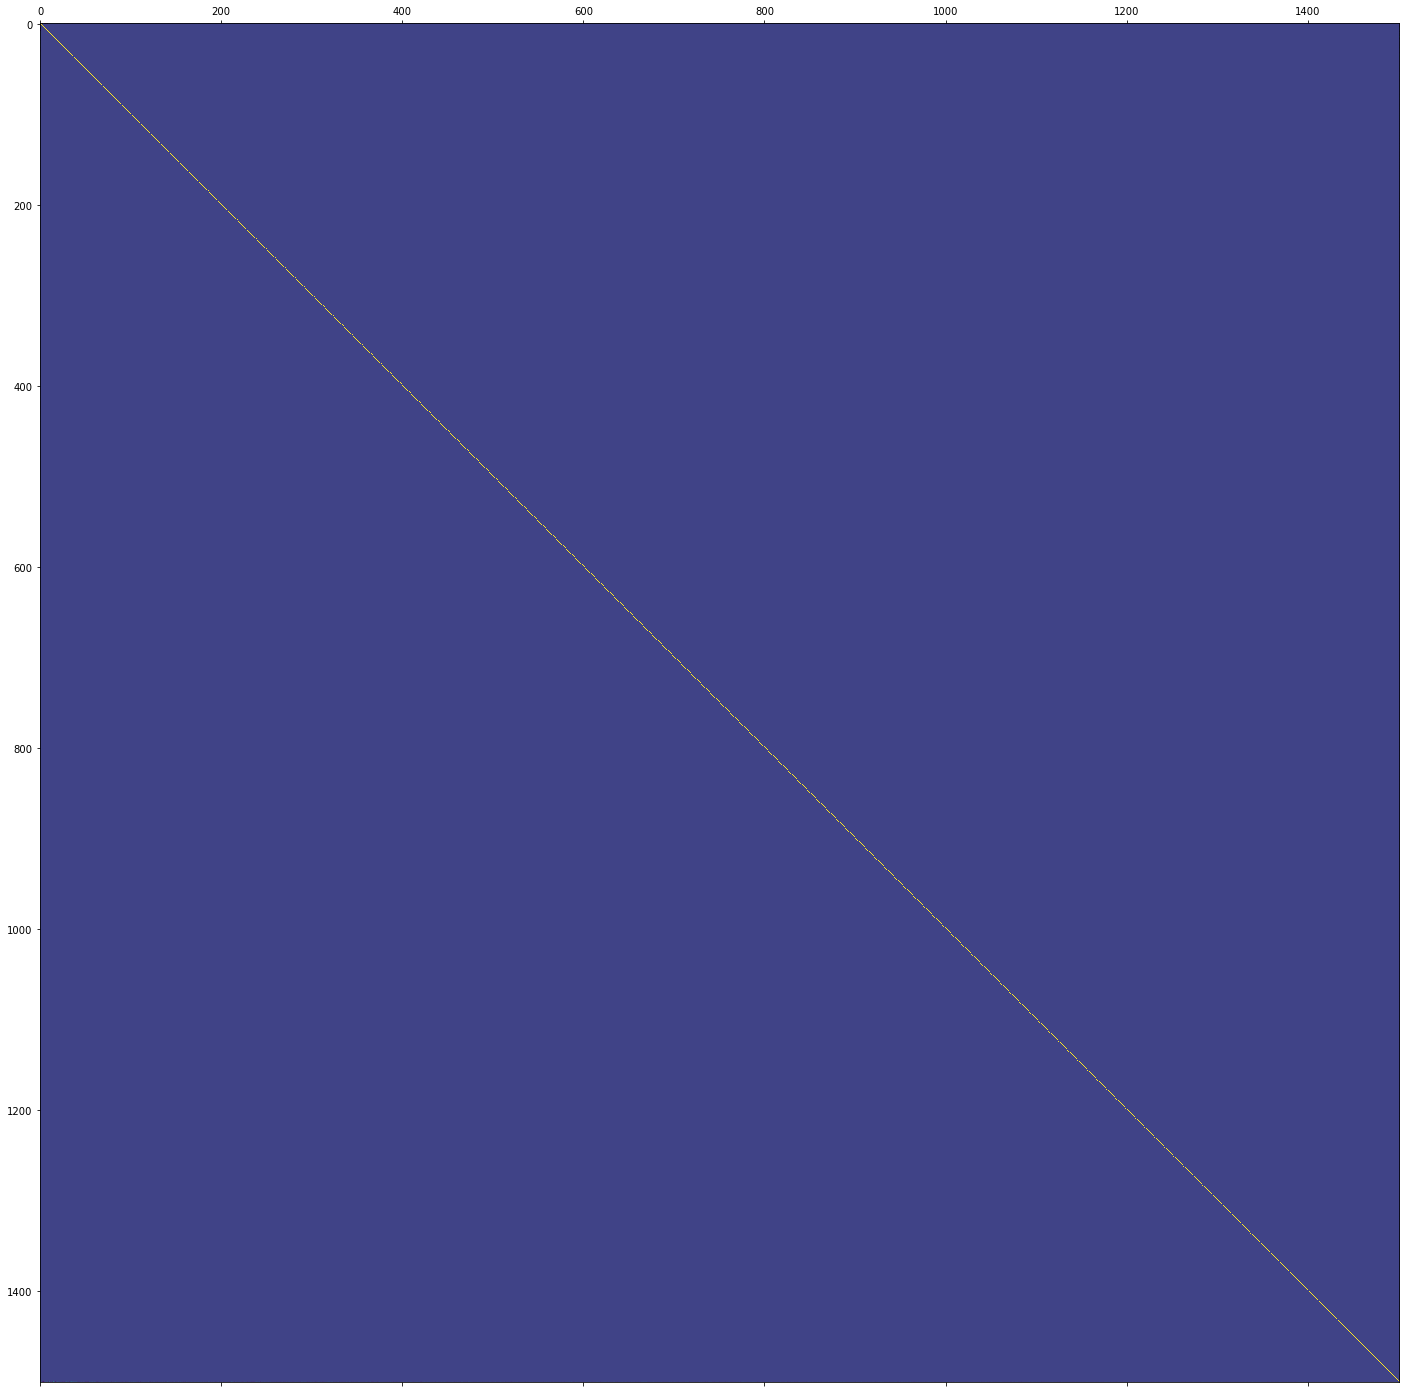

In [47]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(30, 25))

ax.matshow(p)

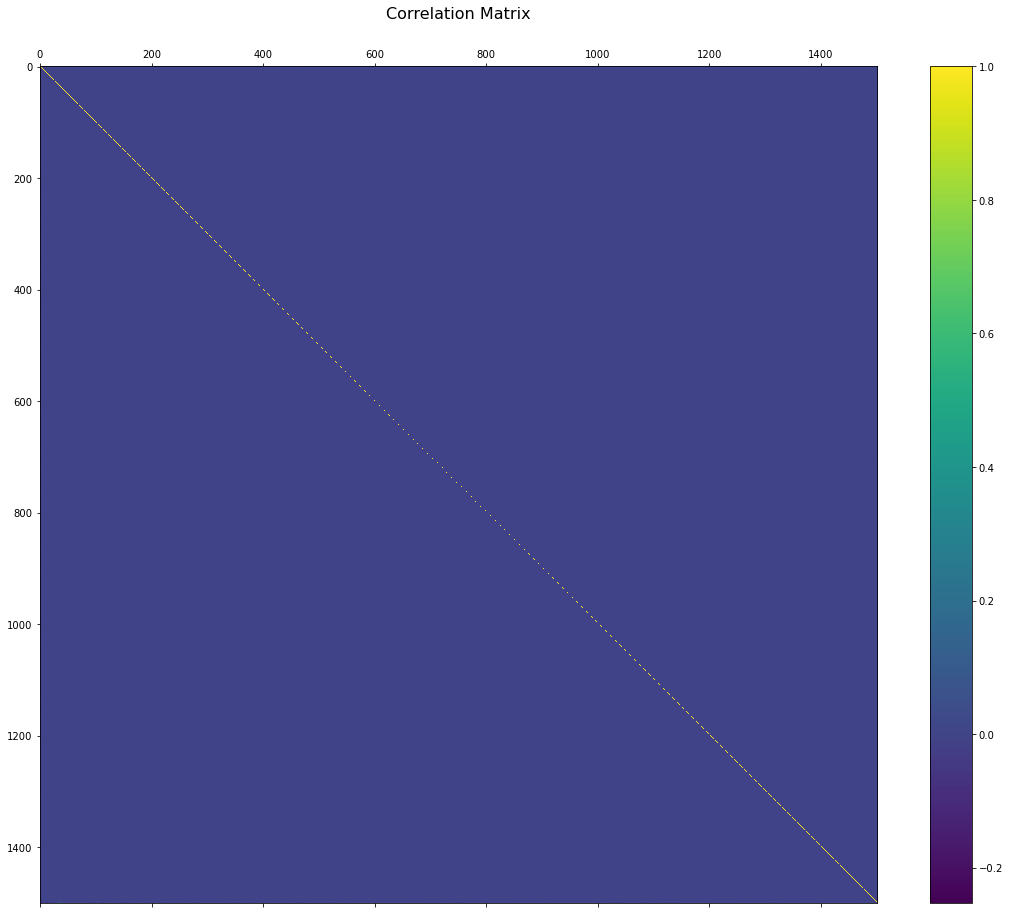

In [60]:
f = plt.figure(figsize=(19, 15))
plt.matshow(p, fignum=f.number)
#plt.xticks(range(p.shape[1]), fontsize=14, rotation=45)
#plt.yticks(range(p.shape[1]), fontsize=14)
cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [79]:
a = np.array(X)
corr = np.zeros((X.shape[1]+1, X.shape[1]+1))
for j in range(X.shape[1]+1):
    for k in range(X.shape[1]+1):
        if j == k:
            continue
        elif j == X.shape[1]:
            p = stats.pearsonr(Y, X[:,k])
        elif k == X.shape[1]:
            p = stats.pearsonr(X[:,j], Y)
        else:
            p = stats.pearsonr(X[:,j], X[:,k])
        
        corr[j,k] = p[0]
        corr[k,j] = p[0]
        
np.fill_diagonal(corr, 1)

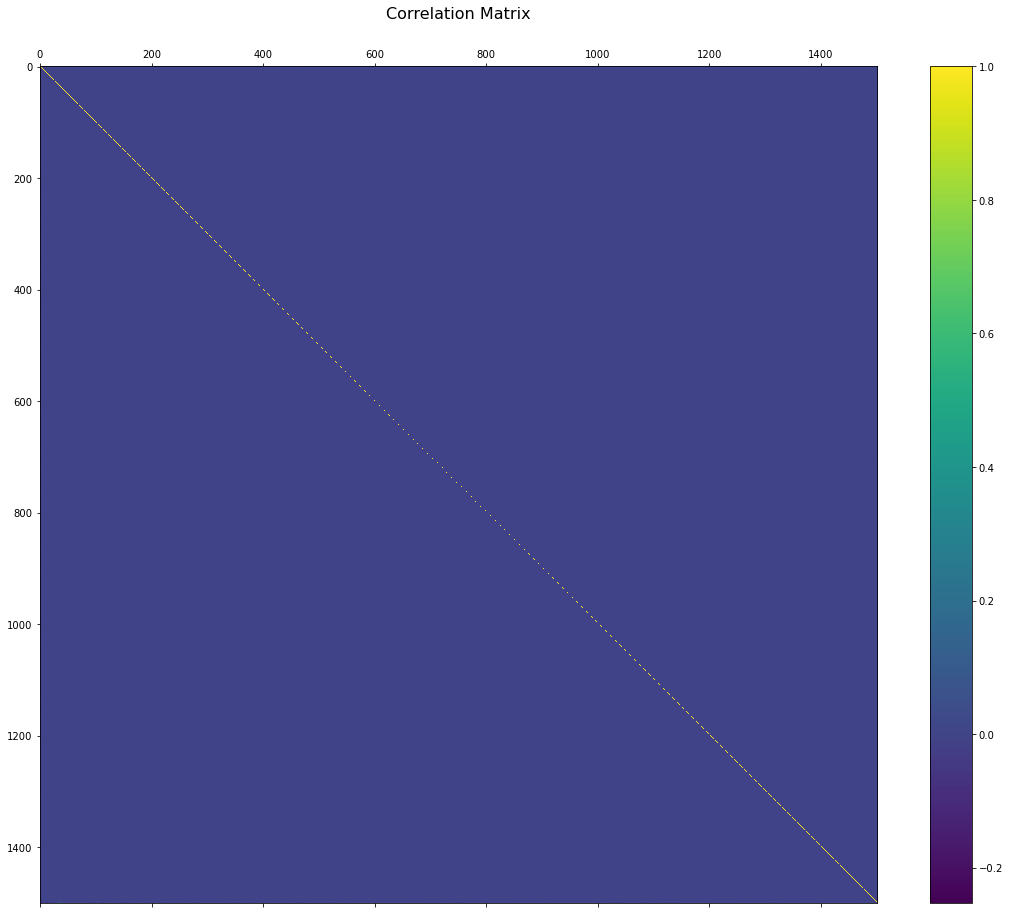

In [73]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
#plt.xticks(range(p.shape[1]), fontsize=14, rotation=45)
#plt.yticks(range(p.shape[1]), fontsize=14)
cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [80]:
p_corr = np.copy(corr)

In [95]:
corr = np.copy(p_corr)

In [123]:
corr_output = p_corr[1500]
corr_output = np.argsort(corr_output)[::-1][1:-1]
corr_output

array([14, 10, 34, ...,  9,  2, 17], dtype=int64)

In [110]:
corr_bet = p_corr[:1500,:1500]
corr_bet.shape

(1500, 1500)

In [119]:
np.fill_diagonal(corr_bet, 0)
corrs = {}
for i in range(corr_bet.shape[1]):
    corrs[i] = np.sum(corr_bet[i])
s = {k: v for k, v in sorted(corrs.items(), key=lambda item: item[1])}
s

{1499: -0.02324248337104071,
 1198: -0.022979105636027432,
 15: -0.022954549562744536,
 976: -0.022794472368549517,
 157: -0.022692439389035427,
 981: -0.0226001441203377,
 275: -0.02257832910954853,
 339: -0.02244924427965252,
 414: -0.022089198515083924,
 1173: -0.02206879455901927,
 516: -0.022012759443575742,
 492: -0.021917592576980352,
 370: -0.021874889363051868,
 796: -0.021717353853195138,
 568: -0.021608932031579393,
 1229: -0.0215167634743206,
 1100: -0.021508703426461474,
 1015: -0.0215017106847711,
 1038: -0.021350240868443202,
 1158: -0.021314005703061908,
 990: -0.02127810134901752,
 541: -0.02127709152340807,
 911: -0.021264727638117674,
 329: -0.02119304409643873,
 405: -0.021065021137352813,
 479: -0.021031181942584812,
 1357: -0.020622987790108595,
 430: -0.02059165043228038,
 889: -0.020384056459598475,
 820: -0.020250801205310275,
 1160: -0.020138305382056094,
 660: -0.020132744915236228,
 520: -0.02006648668201087,
 419: -0.020048793831337765,
 287: -0.01987917380

In [108]:
s[1498]

0.001966614369431736

In [132]:
#for i in corr_output:
#    corrs[i] = (i, p_corr[i,1500])
selected_features = []
for i in corr_output:
    if (corrs[i] > 0.2): #Threshold
        print('Feature:',i, 'Correlation sum:', corrs[i])
        selected_features.append(i)
        
print(selected_features)

Feature: 19 Correlation sum: 20.99784356072845
Feature: 8 Correlation sum: 20.990118783797783
Feature: 185 Correlation sum: 20.998583633122518
Feature: 60 Correlation sum: 20.99852867501397
Feature: 35 Correlation sum: 20.99775379766293
Feature: 1 Correlation sum: 20.994770522685435
Feature: 155 Correlation sum: 20.998224403977023
Feature: 48 Correlation sum: 20.99779106428595
Feature: 54 Correlation sum: 20.998234058761348
Feature: 6 Correlation sum: 20.989940424856186
Feature: 93 Correlation sum: 20.995910900782878
Feature: 137 Correlation sum: 20.998071925364915
Feature: 45 Correlation sum: 20.99834441612899
Feature: 174 Correlation sum: 20.998483214888765
Feature: 68 Correlation sum: 20.997759360514088
Feature: 408 Correlation sum: 20.997981283310082
Feature: 56 Correlation sum: 20.997025972471825
Feature: 404 Correlation sum: 20.99722874829682
Feature: 72 Correlation sum: 20.998317781293945
Feature: 207 Correlation sum: 20.998143844811512
Feature: 822 Correlation sum: 20.998451293

In [135]:
saveMatrix(pd.DataFrame(X[:,selected_features]), "PEARSON_LSA_1500_100")